# House Pricing - Advanced Regression - Assignment

##  Step - 1 - Reading and understanding the data

In [229]:
# Import necessary libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

In [230]:
# Reading the data

df = pd.read_csv("train.csv", encoding = 'utf-8')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [231]:
# Checking info of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [232]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [233]:
df.shape

(1460, 81)

In [234]:
# checking nulls
round(100*(df.isnull().sum()/len(df.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

In [235]:
df.columns[df.isnull().any()] 

nullvalues = df.isnull().sum()/len(df)*100
nullvalues = nullvalues[nullvalues>0]
nullvalues.sort_values(inplace=True, ascending=False)
nullvalues

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

## Deleting columns where more than 80% values are null/NA as majority of data will be filled with same data


In [236]:
df = df.drop(['PoolQC','MiscFeature', 'Alley', 'Fence'], axis = 1)

### Now if we see the data dictionary provided, nulls or NA in the following columns means that particular facility/feature is not present and which might have an effect on the price

    -- "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond"

### Replacing these null/NA values with none

In [237]:
null_with_meaning = ["MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond"]
for i in null_with_meaning:
    df[i].fillna("none", inplace=True)

In [238]:
### Checking nulls again

df.columns[df.isnull().any()] 

nullvalues_2 = df.isnull().sum()/len(df)*100
nullvalues_2 = nullvalues_2[nullvalues_2>0]
nullvalues_2.sort_values(inplace=True, ascending=False)
nullvalues_2

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

In [239]:
# Data Dictionary says - "LotFrontage" is Linear feet of street connected to property.  
# Since it is numeric with fair distribution, it can be imputed with similar 'Neighborhood' values

df['LotFrontage'] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
df["GarageYrBlt"].fillna(df["GarageYrBlt"].median(), inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)
df["Electrical"].dropna(inplace=True)

### Checking for columns having majority data same

In [240]:
df.nunique().sort_values().head(15)

CentralAir      2
Street          2
Utilities       2
PavedDrive      3
BsmtHalfBath    3
LandSlope       3
HalfBath        3
KitchenQual     4
KitchenAbvGr    4
BsmtFullBath    4
Fireplaces      4
ExterQual       4
FullBath        4
LandContour     4
LotShape        4
dtype: int64

In [241]:
df.Street.value_counts(normalize=True)*100

Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64

In [242]:
df.CentralAir.value_counts(normalize=True)*100

Y    93.493151
N     6.506849
Name: CentralAir, dtype: float64

In [243]:
df.Utilities.value_counts(normalize=True)*100

AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64

### Dropping all these 3 columns as majority(>90%) of the data is same and have only 2 values

In [244]:
df = df.drop(['CentralAir','Utilities', 'Street'], axis = 1)

## Step - 2 - EDA on cleaned data


In [245]:
# Check for all numeric values
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

In [246]:
# Drop ID Column
df_numeric = df_numeric.drop(['Id'], axis=1)
df_numeric.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2003       196.0         706           0  ...           0   
1          1976         0.0         978           0  ...         298   
2          2002       162.0         486           0  ...           0   
3          1970         0.0         216           0  ...           0   
4          2000       350.0         655           0  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  

[5 rows x 37 columns]

## Visualising Data and Plotting Graphs

### Findings

    - SalePrice is directly proportional to overall quality
    - Properties in some neighborhood havve high price

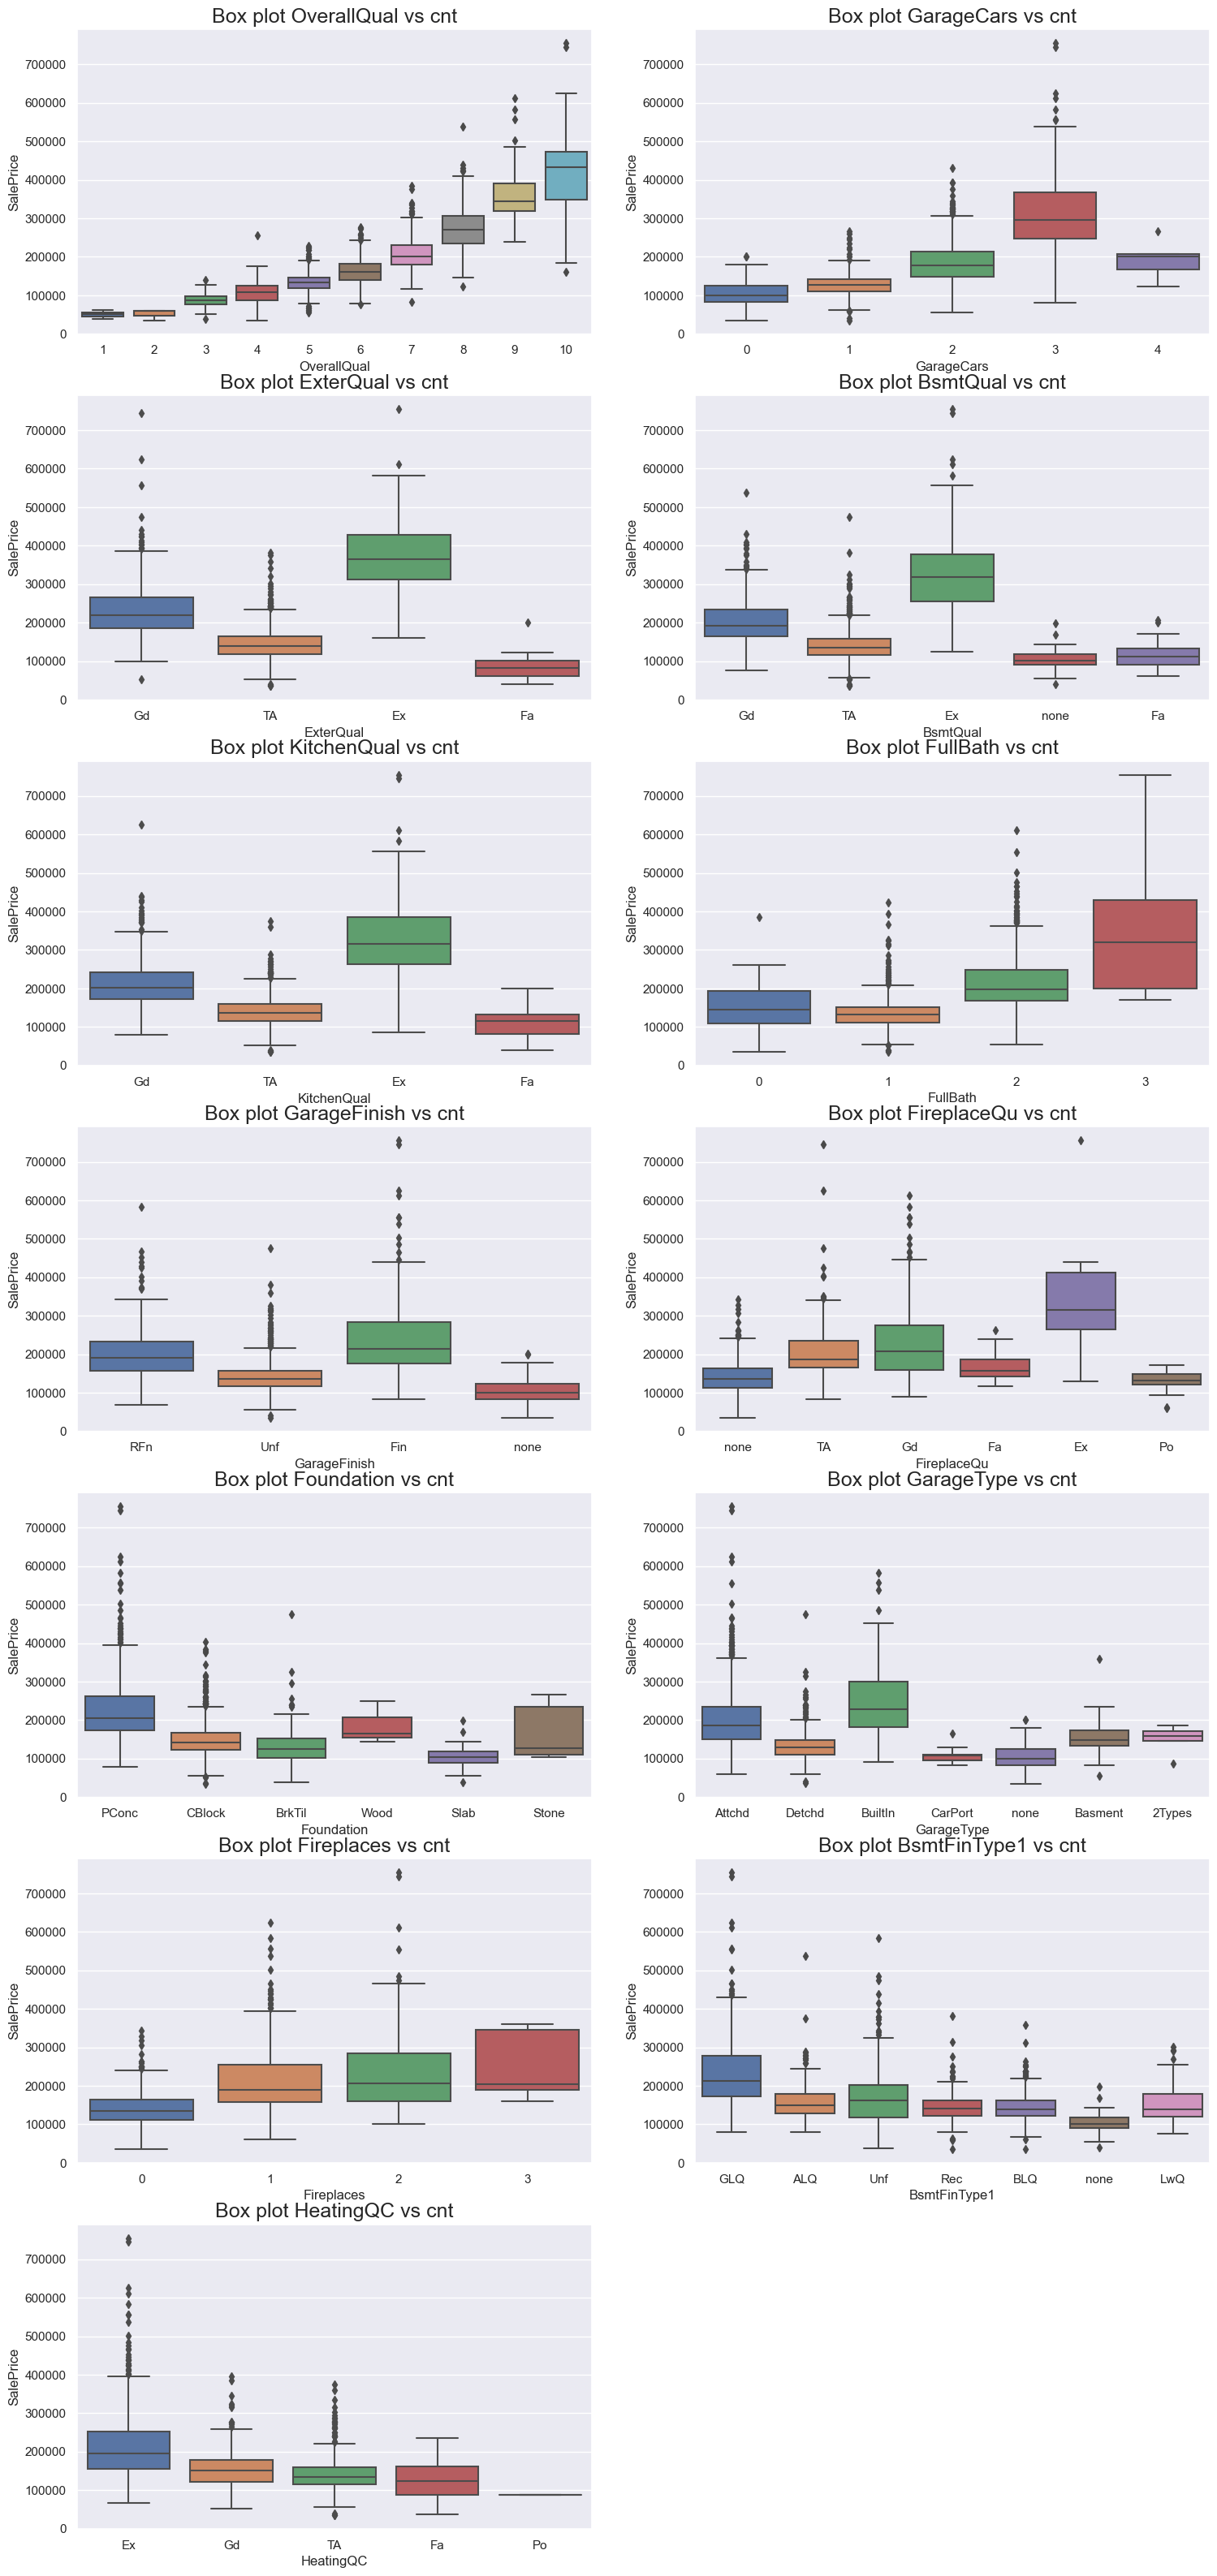

In [247]:
# Box plot of category data

cat_columns= ['OverallQual','GarageCars','ExterQual','BsmtQual','KitchenQual','FullBath','GarageFinish','FireplaceQu','Foundation','GarageType','Fireplaces','BsmtFinType1','HeatingQC']

plt.figure(figsize=[18, 40])

for i, col in enumerate(cat_columns, 1):
    plt.subplot(7,2,i)
    title_text= f'Box plot {col} vs cnt'
    x_label= f'{col}'
    fig= sns.boxplot(data= df, x= col, y= 'SalePrice')
    fig.set_title(title_text, fontdict= { 'fontsize': 18})
    fig.set_xlabel(x_label, fontdict= {'fontsize': 12})
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

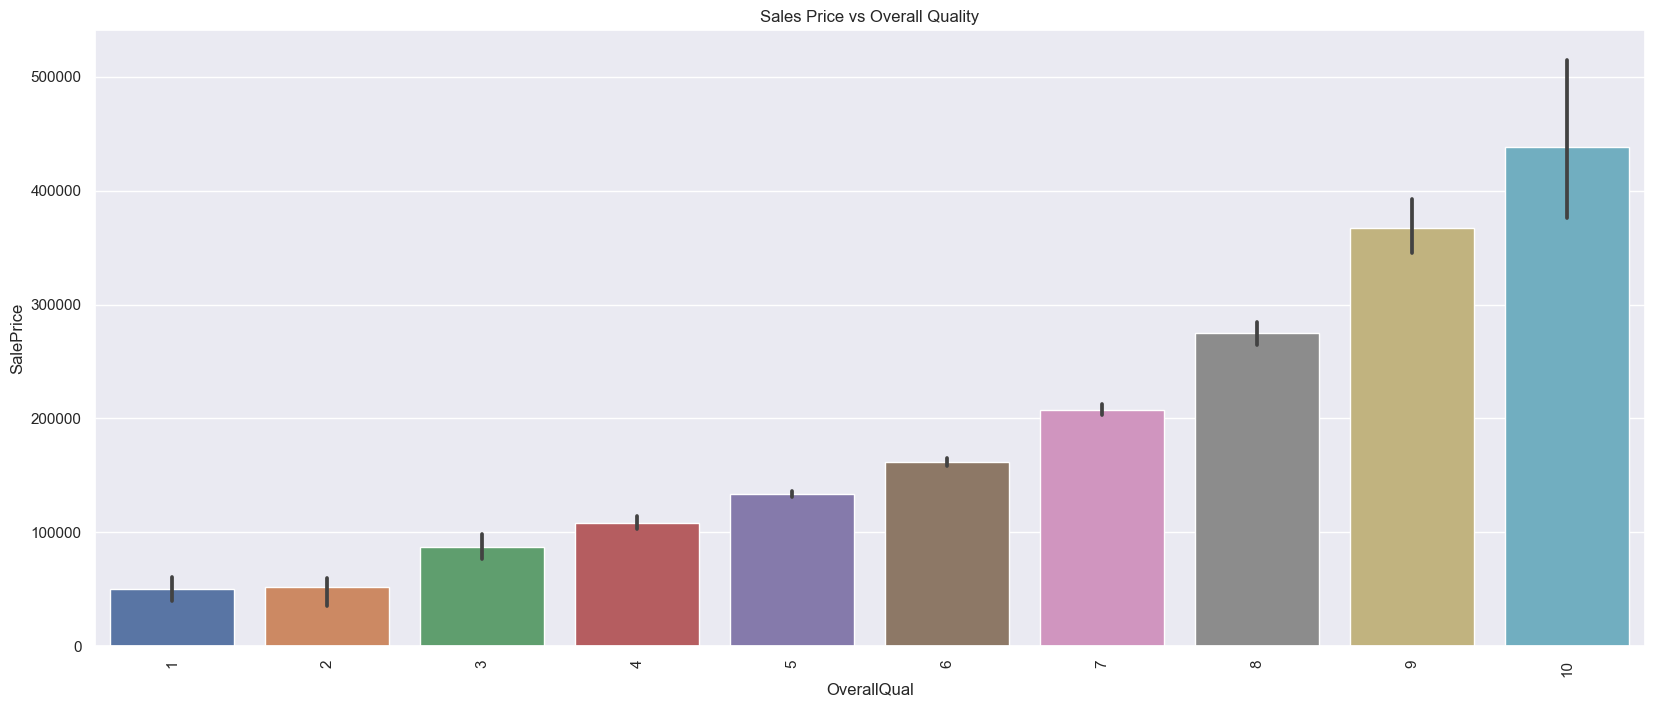

In [248]:
# Plot - 'overall quality' vs 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= df)
plt.title("Sales Price vs Overall Quality")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

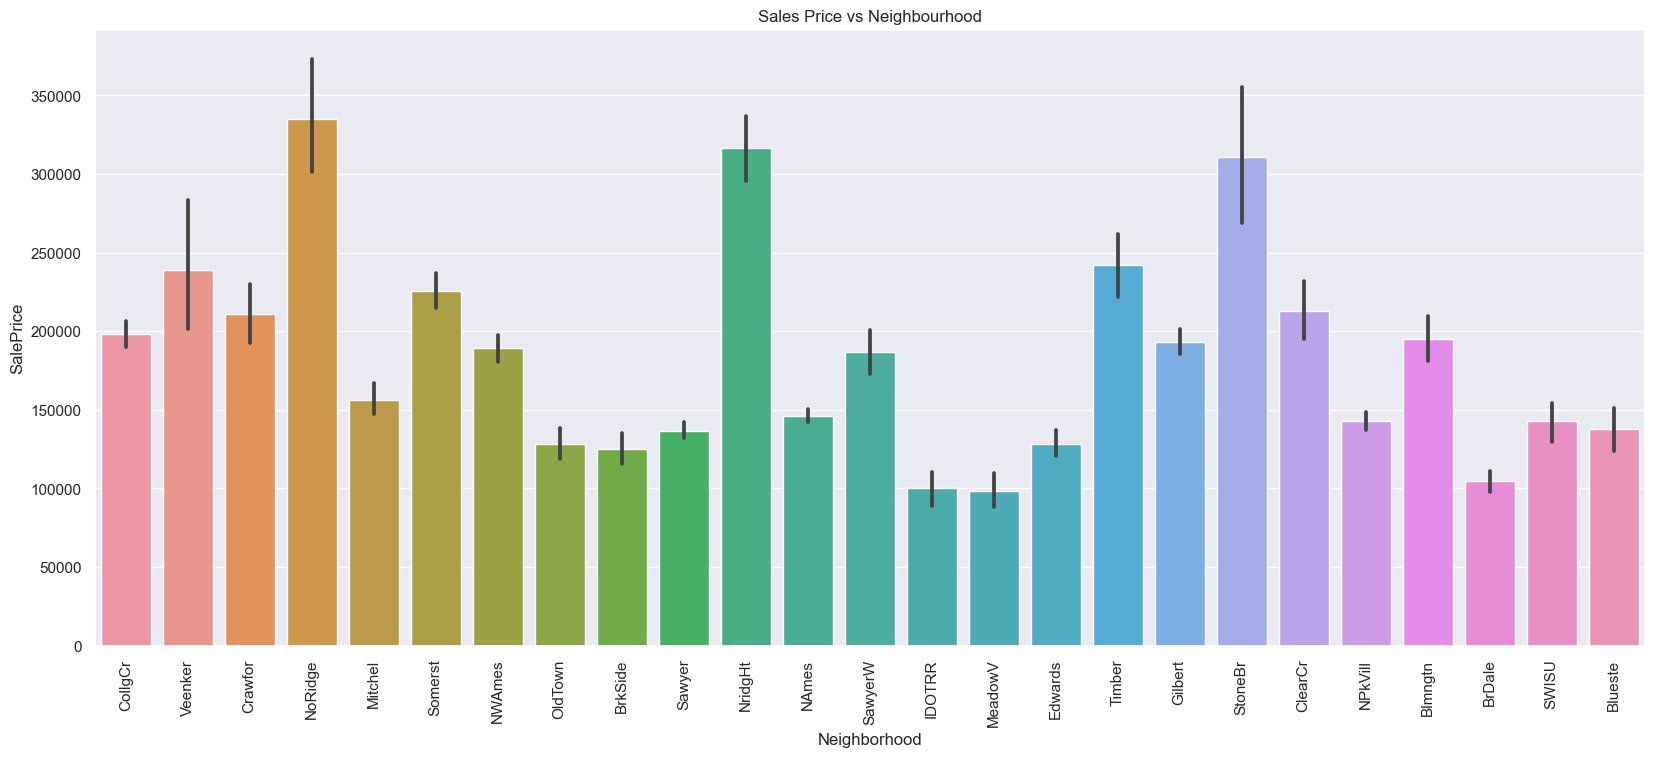

In [249]:
# Plot - 'Sale Price' vs 'Neighborhood'

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= df)
plt.title("Sales Price vs Neighbourhood")
plt.xticks(rotation=90)

<AxesSubplot: xlabel='SalePrice', ylabel='Density'>

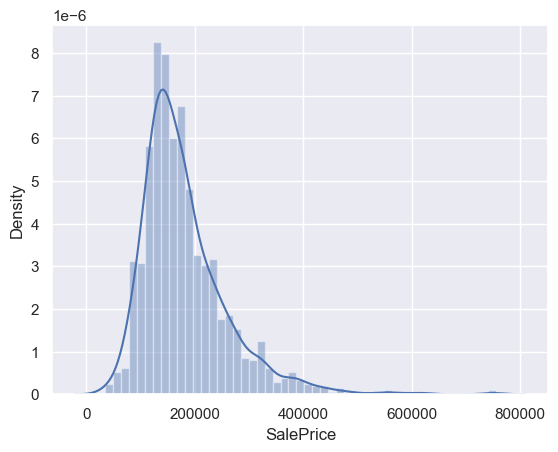

In [250]:
sns.distplot(df['SalePrice'])

### Sales Price are skewed towards left - applying log transformtion

In [251]:
#Log Transformation
df['SalePrice']=np.log1p(df['SalePrice'])

<AxesSubplot: xlabel='SalePrice', ylabel='Density'>

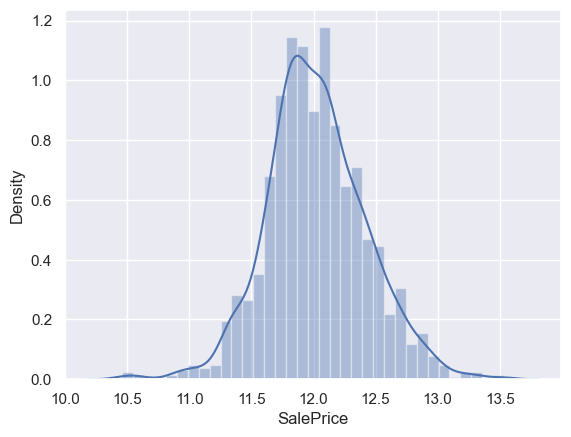

In [252]:
sns.distplot(df['SalePrice'])

## Correlation Matrix

In [253]:
cor = df_numeric.corr()
cor

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.370367 -0.139781     0.032628    -0.059316   
LotFrontage     -0.370367     1.000000  0.335957     0.239546    -0.043595   
LotArea         -0.139781     0.335957  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.239546  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.043595 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.120999  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.084550  0.013788     0.550684     0.073741   
MasVnrArea       0.023573     0.195830  0.103321     0.407252    -0.125694   
BsmtFinSF1      -0.069836     0.232576  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.052237  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.119174 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.381038  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.434109  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.075686  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.031873  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.385190  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.107226  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333     0.006620  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.186561  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.054190  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.245232  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.005627 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.332619  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.249295  0.271364     0.396765    -0.023820   
GarageYrBlt      0.081396     0.062380 -0.025865     0.514231    -0.306276   
GarageCars      -0.040110     0.281393  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.339085  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.088736  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.141734  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.008057 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.064654  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.041063  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.174567  0.077672     0.065166    -0.001985   
MiscVal         -0.007683     0.005332  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.007370  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.004756 -0.014261    -0.027347     0.043950   
SalePrice       -0.084284     0.349876  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.023573   -0.069836   -0.065649   
LotFrontage     0.120999      0.084550    0.195830    0.232576    0.052237   
LotArea         0.014228      0.013788    0.103321    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.407252    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.125694   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.311600    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.176529    0.128451   -0.067759   
MasVnrArea      0.311600      0.176529    1.000000    0.261256   -0.071330   
BsmtFinSF1      0.249503      0.128451    0.261256    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.071330   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.113862   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.360067    0.522396    0.104810   
1stFlrSF        0.281986      0.2403

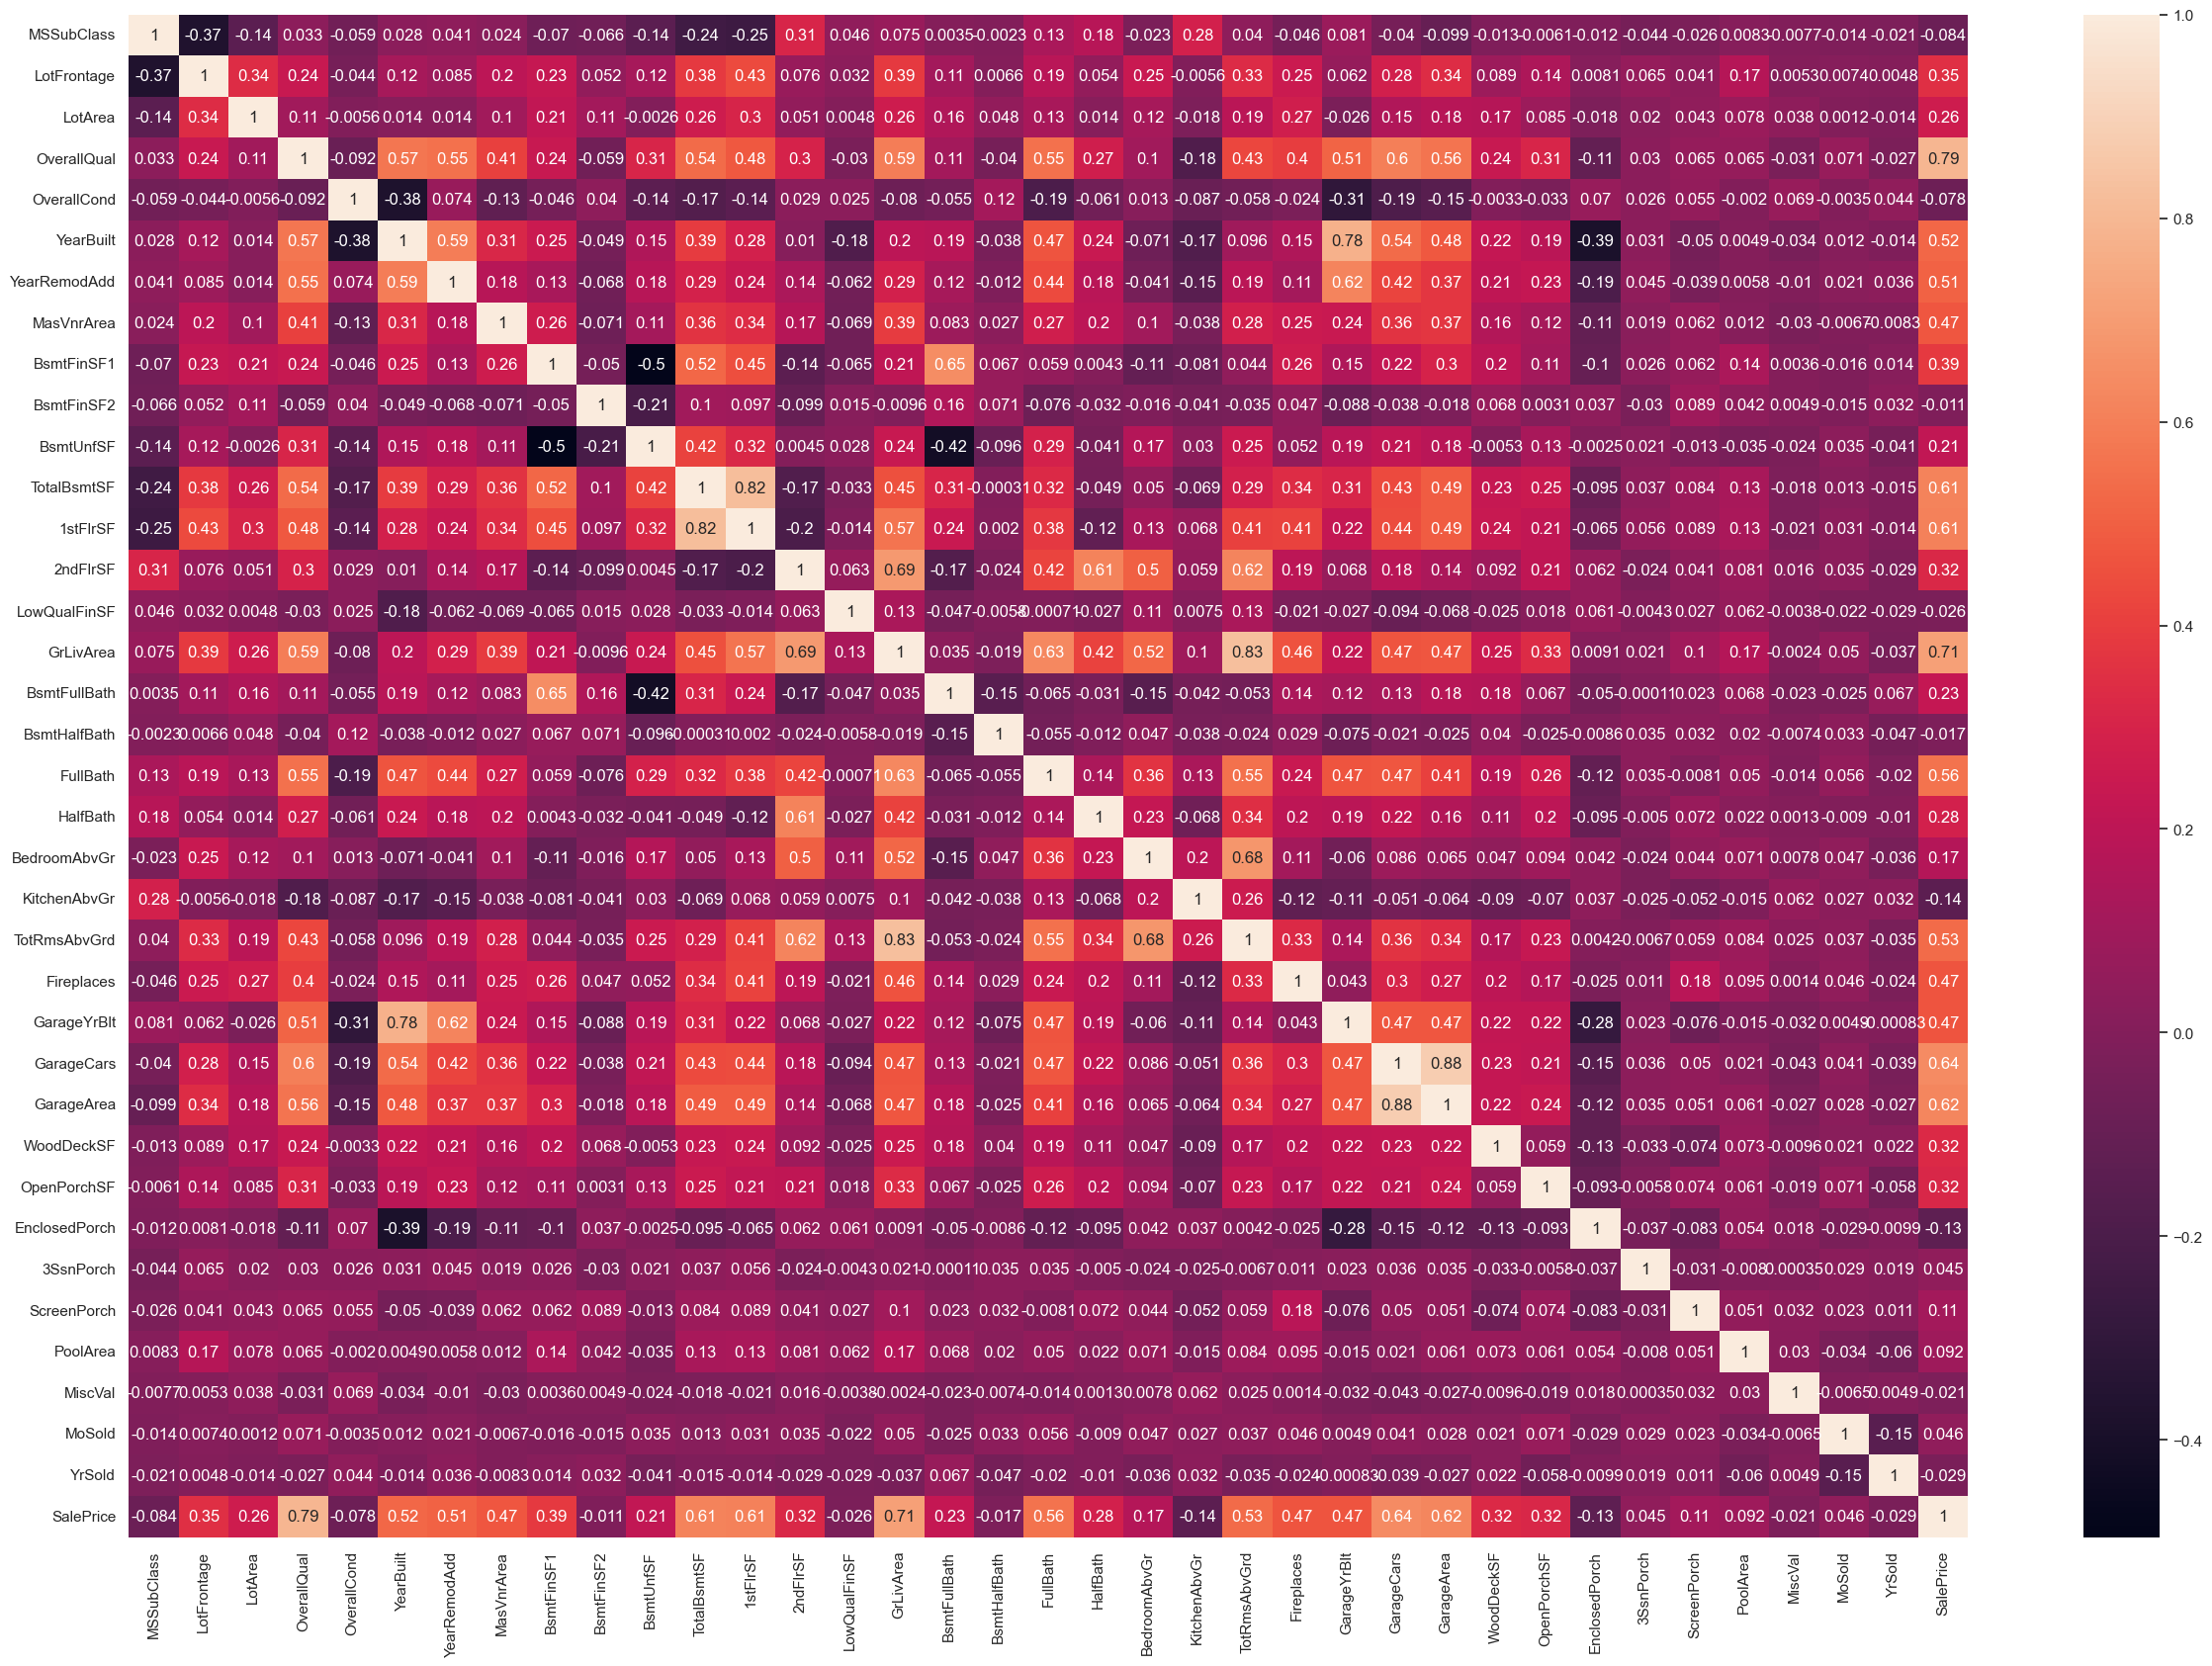

In [254]:
# Correlation heatmap

plt.figure(figsize=(30,20))
sns.heatmap(cor, annot=True)
plt.show()

### Finding - Some of the variables are correlated

#### Checking predictive powers

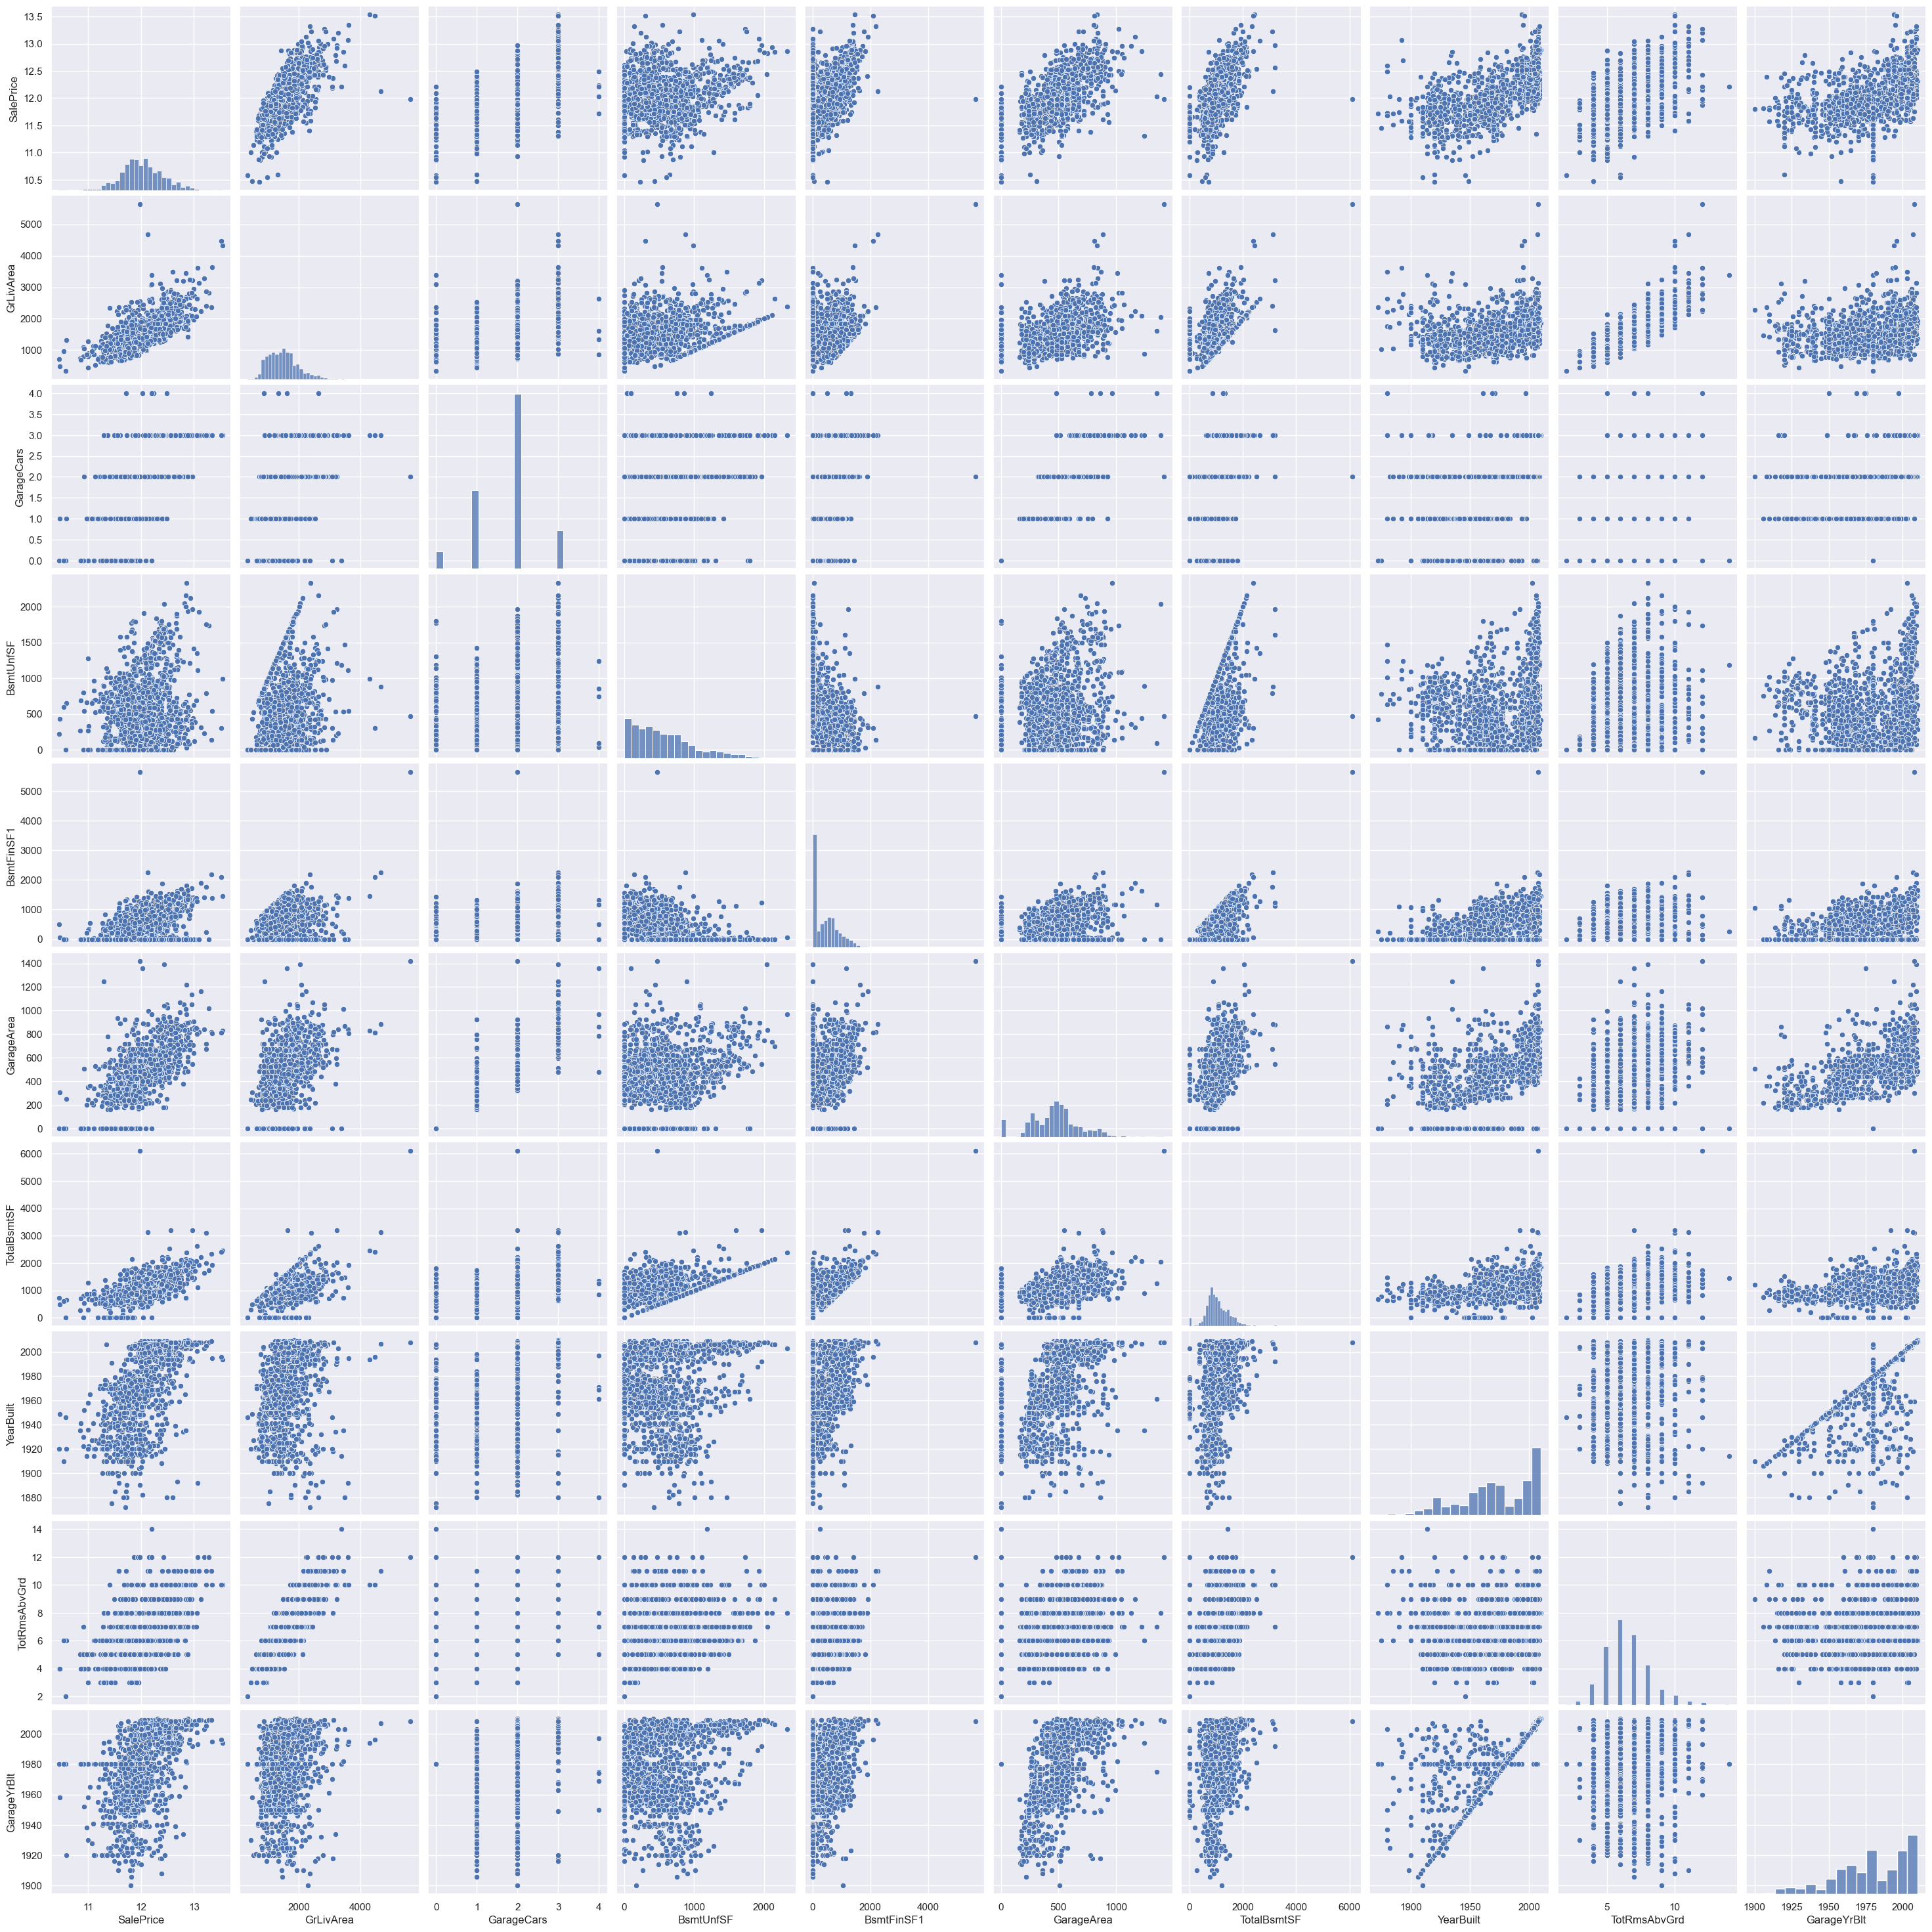

In [255]:
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(df[cols], size = 3)
plt.show()

### Dropping correlated columns that are not contributing to Sales Price

In [256]:
df = df.drop(['GarageCars'], axis = 1)
df = df.drop(['BsmtUnfSF'], axis = 1)
df = df.drop(['TotRmsAbvGrd'], axis = 1)
df = df.drop(['GarageYrBlt'], axis = 1)    

df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0   1          60       RL         65.0     8450      Reg         Lvl   
1   2          20       RL         80.0     9600      Reg         Lvl   
2   3          60       RL         68.0    11250      IR1         Lvl   
3   4          70       RL         60.0     9550      IR1         Lvl   
4   5          60       RL         84.0    14260      IR1         Lvl   

  LotConfig LandSlope Neighborhood  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    Inside       Gtl      CollgCr  ...             0         0           0   
1       FR2       Gtl      Veenker  ...             0         0           0   
2    Inside       Gtl      CollgCr  ...             0         0           0   
3    Corner       Gtl      Crawfor  ...           272         0           0   
4       FR2       Gtl      NoRidge  ...             0         0           0   

  PoolArea  MiscVal  MoSold  YrSold  SaleType SaleCondition  SalePrice  
0        0        0       2    2008        WD        Normal  12.247699  
1        0        0       5    2007        WD        Normal  12.109016  
2        0        0       9    2008        WD        Normal  12.317171  
3        0        0       2    2006        WD       Abnorml  11.849405  
4        0        0      12    2008        WD        Normal  12.429220  

[5 rows x 70 columns]

### Analysing Numeric Columns

In [257]:
df.select_dtypes(exclude=['object'])

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0          2003          2003       196.0         706  ...           0   
1          1976          1976         0.0         978  ...         298   
2          2001          2002       162.0         486  ...           0   
3          1915          1970         0.0         216  ...           0   
4          2000          2000       350.0         655  ...         192   
...         ...           ...         ...         ...  ...         ...   
1455       1999          2000         0.0           0  ...           0   
1456       1978          1988       119.0         790  ...         349   
1457       1941          2006         0.0         275  ...           0   
1458       1950          1996         0.0          49  ...         366   
1459       1965          1965         0.0         830  ...         736   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0              61              0          0            0         0        0   
1               0              0          0            0         0        0   
2              42              0          0            0         0        0   
3              35            272          0            0         0        0   
4              84              0          0            0         0        0   
...           ...            ...        ...          ...       ...      ...   
1455           40              0          0            0         0        0   
1456            0              0          0            0         0        0   
1457           60              0          0            0         0     2500   
1458            0            112          0            0         0        0   
1459           68              0          0            0         0        0   

      MoSold  YrSold  SalePrice  
0          2    2008  12.247699  
1          5    2007  12.109016  
2          9    2008  12.317171  
3          2    2006  11.849405  
4         12    2008  12.429220  
...      ...     ...        ...  
1455       8    2007  12.072547  
1456       2    2010  12.254868  
1457       5    2010  12.493133  
1458       4    2010  11.864469  
1459       6    2008  11.901590  

[1460 rows x 34 columns]

#### Outliers

In [258]:
# Checking outliers
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.199658   10516.828082     6.099315   
std     421.610009    42.300571    22.431902    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    60.000000    7553.500000     5.000000   
50%     730.500000    50.000000    70.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
90%    1314.100000   120.000000    92.000000   14381.700000     8.000000   
95%    1387.050000   160.000000   104.000000   17401.150000     8.000000   
99%    1445.410000   190.000000   137.410000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.117123   443.639726  ...   
std       1.112799    30.202904     20.645407   180.731373   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   164.250000   712.250000  ...   
90%       7.000000  2006.000000   2006.000000   335.000000  1065.500000  ...   
95%       8.000000  2007.000000   2007.000000   456.000000  1274.000000  ...   
99%       9.000000  2009.000000   2009.000000   791.280000  1572.410000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
90%     262.000000   130.000000     112.000000     0.000000     0.000000   
95%     335.000000   175.050000     180.150000     0.000000   160.000000   
99%     505.460000   285.820000     261.050000   168.000000   268.050000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold    SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753    12.024057  
std      40.177307    496.123024     2.703626     1.328095     0.399449  
min       0.000000      0.000000     1.000000  2006.000000    10.460271  
25%       0.000000      0.000000     5.000000  2007.000000    11.775105  
50%       0.000000      0.000000     6.000000  2008.000000    12.001512  
75%       0.000000      0.000000     8.000000  2009.000000    12.273736  
90%       0.000000      0.000000    10.000000  2010.000000    12.535380  
95%       0.000000      0.000000    11.000000  2010.000000    12.694962  
99%       0.000000    700.000000    12.000000  2010.000000    13.000325  
max     738.000000  15500.000000    12.000000  2010.000000    13.534474  

[11 rows x 34 columns]

In [259]:
# Method to remove outliers
def remove_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

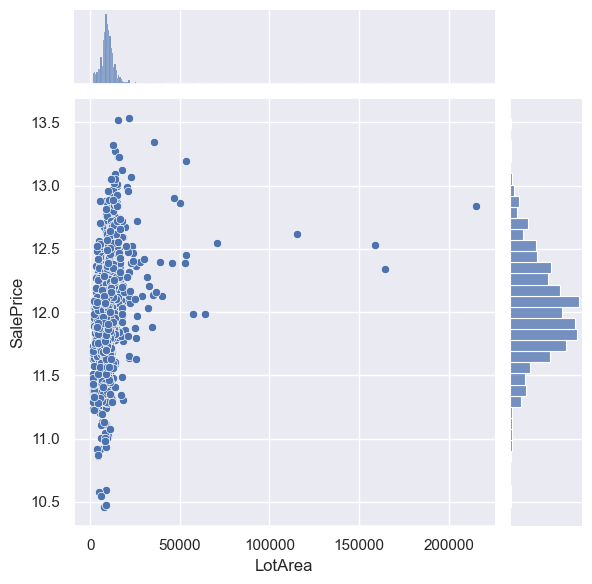

In [260]:
# LotArea vs SalePrice
sns.jointplot(x = df['LotArea'], y = df['SalePrice'])
plt.show()

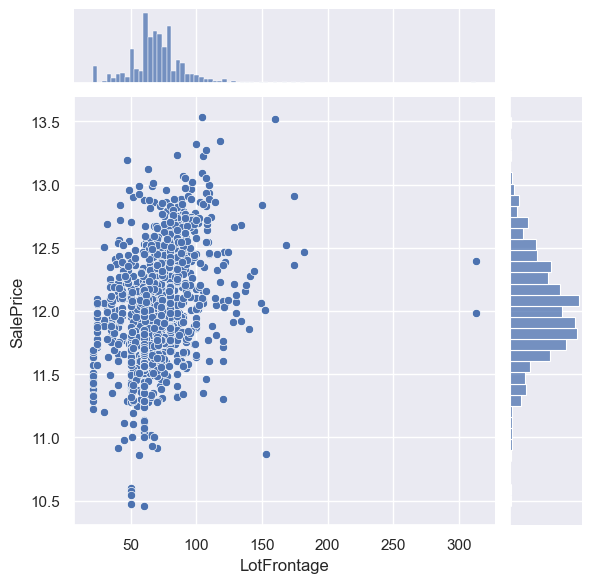

In [261]:
# Lot frontage vs SalePrice 
sns.jointplot(x = df['LotFrontage'], y = df['SalePrice'])
plt.show()

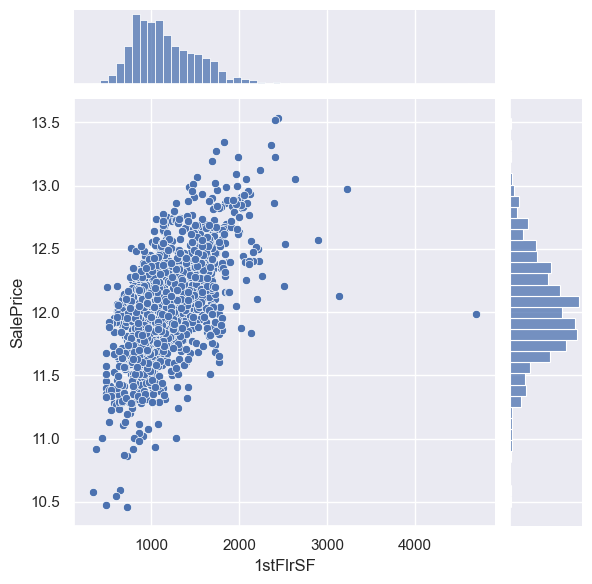

In [262]:
# 1stFlrSF vs SalePrice
sns.jointplot(x = df['1stFlrSF'], y = df['SalePrice'])
plt.show()

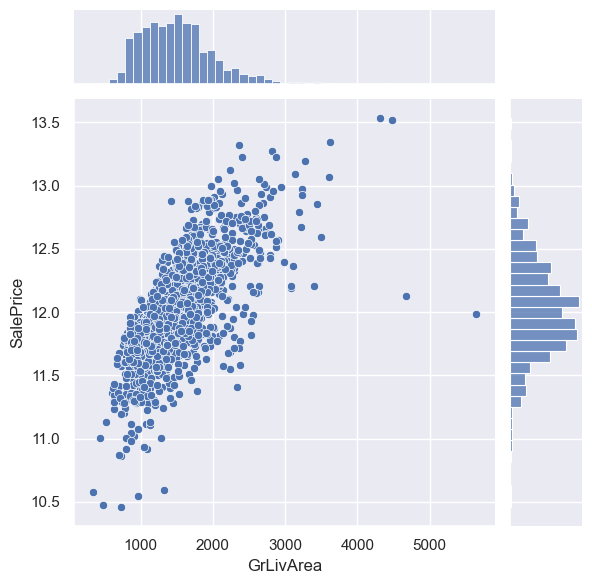

In [263]:
# GrLivArea vs SalePrice
sns.jointplot(x='GrLivArea', y='SalePrice', data=df)
plt.show()

In [264]:
# Removing some outliers of 'GrLivArea'
df = remove_outliers(df,'GrLivArea')

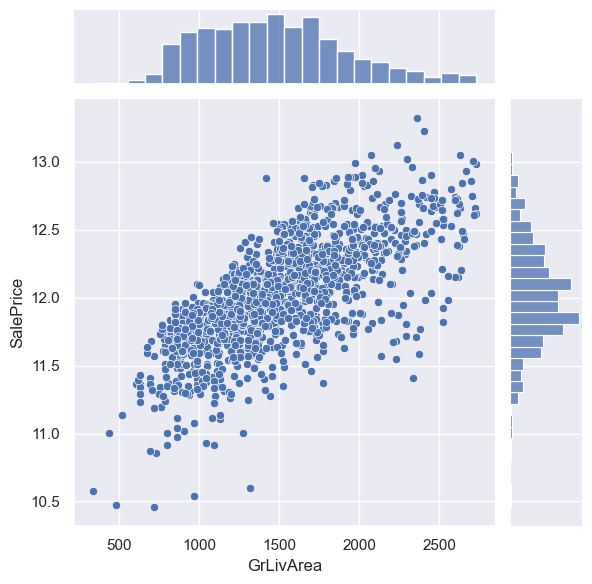

In [265]:
# Again plotting GeLivArea vs SalePrice
sns.jointplot(x = df['GrLivArea'], y = df['SalePrice'])
plt.show()

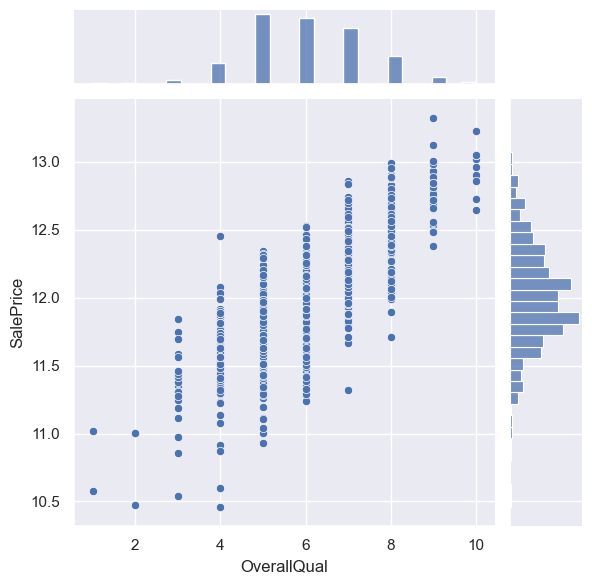

In [266]:
# OverallQual vs SalePrice
sns.jointplot(x = df['OverallQual'], y = df['SalePrice'])
plt.show()

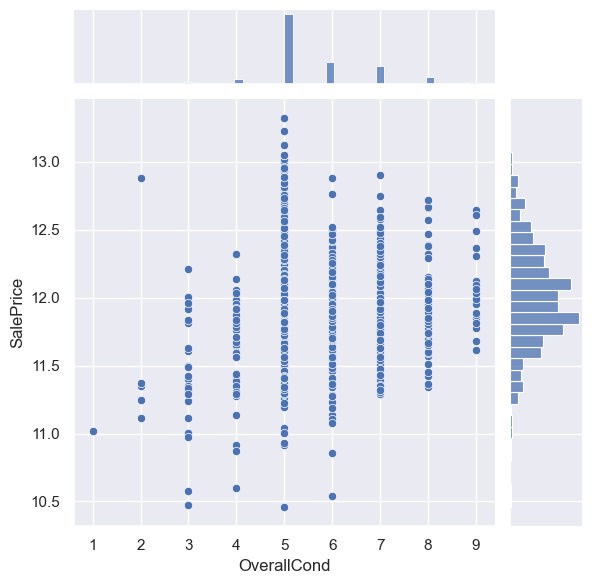

In [267]:
# OverallCond vs SalePrice
sns.jointplot(x=df['OverallCond'], y = df['SalePrice'])
plt.show()

### Deriving a column for the age of property as PropertyAge

In [268]:
# PropertyAge -  Property Age from yearsold - yearbuilt
df['PropertyAge'] = (df['YrSold'] - df['YearBuilt'])
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0   1          60       RL         65.0     8450      Reg         Lvl   
1   2          20       RL         80.0     9600      Reg         Lvl   
2   3          60       RL         68.0    11250      IR1         Lvl   
3   4          70       RL         60.0     9550      IR1         Lvl   
4   5          60       RL         84.0    14260      IR1         Lvl   

  LotConfig LandSlope Neighborhood  ... 3SsnPorch ScreenPorch PoolArea  \
0    Inside       Gtl      CollgCr  ...         0           0        0   
1       FR2       Gtl      Veenker  ...         0           0        0   
2    Inside       Gtl      CollgCr  ...         0           0        0   
3    Corner       Gtl      Crawfor  ...         0           0        0   
4       FR2       Gtl      NoRidge  ...         0           0        0   

  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice PropertyAge  
0       0       2    2008        WD         Normal  12.247699           5  
1       0       5    2007        WD         Normal  12.109016          31  
2       0       9    2008        WD         Normal  12.317171           7  
3       0       2    2006        WD        Abnorml  11.849405          91  
4       0      12    2008        WD         Normal  12.429220           8  

[5 rows x 71 columns]

In [269]:
# Dropping Month sold, year sold, year built, year remodelled
df = df.drop(['MoSold'], axis = 1)
df = df.drop(['YrSold'], axis = 1)
df = df.drop(['YearBuilt'], axis = 1)
df = df.drop(['YearRemodAdd'], axis = 1)
df.head() 

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0   1          60       RL         65.0     8450      Reg         Lvl   
1   2          20       RL         80.0     9600      Reg         Lvl   
2   3          60       RL         68.0    11250      IR1         Lvl   
3   4          70       RL         60.0     9550      IR1         Lvl   
4   5          60       RL         84.0    14260      IR1         Lvl   

  LotConfig LandSlope Neighborhood  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
0    Inside       Gtl      CollgCr  ...          61             0         0   
1       FR2       Gtl      Veenker  ...           0             0         0   
2    Inside       Gtl      CollgCr  ...          42             0         0   
3    Corner       Gtl      Crawfor  ...          35           272         0   
4       FR2       Gtl      NoRidge  ...          84             0         0   

  ScreenPorch  PoolArea  MiscVal SaleType SaleCondition  SalePrice PropertyAge  
0           0         0        0       WD        Normal  12.247699           5  
1           0         0        0       WD        Normal  12.109016          31  
2           0         0        0       WD        Normal  12.317171           7  
3           0         0        0       WD       Abnorml  11.849405          91  
4           0         0        0       WD        Normal  12.429220           8  

[5 rows x 67 columns]

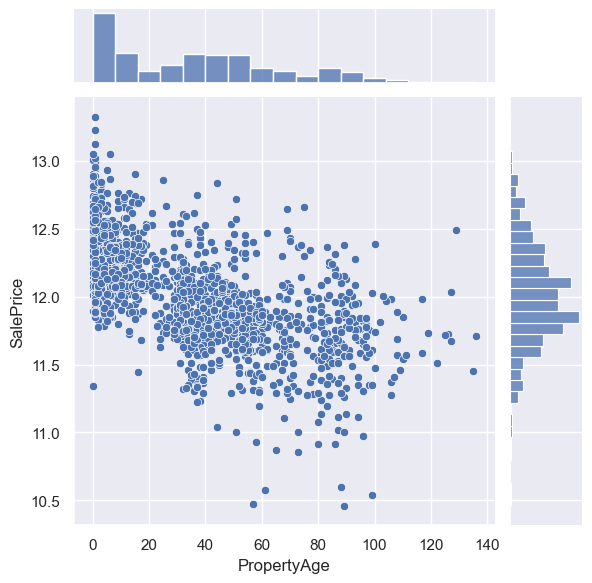

In [270]:
# PropertyAge vs SalePrice
sns.jointplot(x = df['PropertyAge'], y = df['SalePrice'])
plt.show()

### Findings - Increase in property age decreases sale price. Older the property lesser the price

## Step - 3 - Data Preparation

In [271]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0   1          60       RL         65.0     8450      Reg         Lvl   
1   2          20       RL         80.0     9600      Reg         Lvl   
2   3          60       RL         68.0    11250      IR1         Lvl   
3   4          70       RL         60.0     9550      IR1         Lvl   
4   5          60       RL         84.0    14260      IR1         Lvl   

  LotConfig LandSlope Neighborhood  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
0    Inside       Gtl      CollgCr  ...          61             0         0   
1       FR2       Gtl      Veenker  ...           0             0         0   
2    Inside       Gtl      CollgCr  ...          42             0         0   
3    Corner       Gtl      Crawfor  ...          35           272         0   
4       FR2       Gtl      NoRidge  ...          84             0         0   

  ScreenPorch  PoolArea  MiscVal SaleType SaleCondition  SalePrice PropertyAge  
0           0         0        0       WD        Normal  12.247699           5  
1           0         0        0       WD        Normal  12.109016          31  
2           0         0        0       WD        Normal  12.317171           7  
3           0         0        0       WD       Abnorml  11.849405          91  
4           0         0        0       WD        Normal  12.429220           8  

[5 rows x 67 columns]

In [272]:
# Drop 'Id' from Dataframe

df = df.drop(['Id'], axis=1)
df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
3          70       RL         60.0     9550      IR1         Lvl    Corner   
4          60       RL         84.0    14260      IR1         Lvl       FR2   

  LandSlope Neighborhood Condition1  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
0       Gtl      CollgCr       Norm  ...          61             0         0   
1       Gtl      Veenker      Feedr  ...           0             0         0   
2       Gtl      CollgCr       Norm  ...          42             0         0   
3       Gtl      Crawfor       Norm  ...          35           272         0   
4       Gtl      NoRidge       Norm  ...          84             0         0   

   ScreenPorch  PoolArea MiscVal SaleType SaleCondition  SalePrice PropertyAge  
0            0         0       0       WD        Normal  12.247699           5  
1            0         0       0       WD        Normal  12.109016          31  
2            0         0       0       WD        Normal  12.317171           7  
3            0         0       0       WD       Abnorml  11.849405          91  
4            0         0       0       WD        Normal  12.429220           8  

[5 rows x 66 columns]

In [273]:
# Types of data
pd.DataFrame(df.dtypes).reset_index().set_index(0).reset_index()[0].value_counts()

object     36
int64      27
float64     3
Name: 0, dtype: int64

In [274]:
#Numerical Columns
numerical_columns = list(df.dtypes[(df.dtypes == 'int64') | (df.dtypes == 'float')].index)
print(numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'PropertyAge']


In [275]:
#Categorlical Columns
#Numerical Columns
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
print(categorical_columns)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


### Creating Dummy Columns for converting categorical into numerical

In [276]:
df = pd.get_dummies(df, drop_first=True )
df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
0         706           0          856       856  ...               0   
1         978           0         1262      1262  ...               0   
2         486           0          920       920  ...               0   
3         216           0          756       961  ...               0   
4         655           0         1145      1145  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 236 columns]

In [277]:
# Finding X
X = df.drop(['SalePrice'], axis=1)
X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
0         706           0          856       856  ...               0   
1         978           0         1262      1262  ...               0   
2         486           0          920       920  ...               0   
3         216           0          756       961  ...               0   
4         655           0         1145      1145  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 235 columns]

In [278]:
#Finding y
y = df['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

#### Test Train Split

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [280]:
## Using standard scaler
scaler = StandardScaler()

X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropertyAge']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropertyAge']])

X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropertyAge']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropertyAge']])

In [281]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
11      0.085645     0.746261  0.154684     2.241710    -0.513939    1.145212   
1070   -0.869945     0.130905 -0.020017    -0.764271    -0.513939    0.152993   
513    -0.869945     0.083570 -0.115156    -0.012775    -0.513939   -0.564274   
467     0.324542     0.462250 -0.086269    -0.764271     1.258264    0.774624   
993     0.085645    -0.058435 -0.148775    -0.012775    -0.513939   -0.564274   

      BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
11      1.323938   -0.300737     0.345478  0.113320  ...               0   
1070    0.360916   -0.300737     0.030191 -0.267693  ...               0   
513    -0.223442   -0.300737     0.119563 -0.176705  ...               0   
467    -0.106571   -0.300737    -0.764234 -0.722635  ...               0   
993    -1.008820   -0.300737    -0.709617 -1.115022  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
11                 0             1             0            0   
1070               0             0             0            1   
513                0             0             0            1   
467                0             0             0            1   
993                0             1             0            0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
11                        0                     0                     0   
1070                      0                     0                     0   
513                       0                     0                     0   
467                       0                     0                     0   
993                       0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
11                       0                      1  
1070                     1                      0  
513                      1                      0  
467                      1                      0  
993                      0                      1  

[5 rows x 235 columns]

In [282]:
X_test.head()

MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  \
461     0.282163    -0.495702  -0.339155     0.620334     3.325664   
335     3.002345     0.729276  17.009026    -0.825989     0.435637   
200    -0.851246     0.484280  -0.190859    -1.549150    -0.527705   
214     0.055482    -0.005711   0.068493    -0.102827     1.398980   
1003    0.735527     0.484280   0.134598    -0.825989     0.435637   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  \
461    -0.606456   -0.211663    0.997135    -1.205047 -1.556925  ...   
335    -0.606456    1.881258    0.620602     1.075768  1.258064  ...   
200    -0.606456   -1.026482   -0.257974     0.157612 -0.084718  ...   
214     0.272709   -0.146477   -0.257974    -0.891708 -1.249541  ...   
1003    0.335917   -1.026482   -0.257974     1.515413  1.422541  ...   

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
461                0               0             0             0            1   
335                0               0             0             0            1   
200                0               0             0             0            1   
214                0               0             0             0            1   
1003               0               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
461                       0                     0                     0   
335                       0                     0                     0   
200                       0                     0                     0   
214                       0                     0                     0   
1003                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
461                      1                      0  
335                      1                      0  
200                      1                      0  
214                      1                      0  
1003                     1                      0  

[5 rows x 235 columns]

## Step - 4 - Model Building and Evaluation

In [283]:
# Using RFE to find out the top 100 features
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=100)            
rfe = rfe.fit(X_train, y_train)

In [284]:
# Checking the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', False, 94),
 ('LotArea', False, 10),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 113),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 79),
 ('TotalBsmtSF', False, 26),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 73),
 ('BsmtHalfBath', False, 116),
 ('FullBath', False, 123),
 ('HalfBath', False, 78),
 ('BedroomAbvGr', False, 108),
 ('KitchenAbvGr', False, 95),
 ('Fireplaces', False, 118),
 ('GarageArea', False, 37),
 ('WoodDeckSF', False, 70),
 ('OpenPorchSF', False, 121),
 ('EnclosedPorch', False, 72),
 ('3SsnPorch', False, 101),
 ('ScreenPorch', False, 68),
 ('PoolArea', False, 92),
 ('MiscVal', False, 129),
 ('PropertyAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 97),
 ('LotShape_IR3', False, 8),
 ('LotShape_Reg', False, 115)

In [285]:
colTrain = X_train.columns[rfe.support_]
colTrain

Index(['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFinSF1', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'PropertyAge', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LandSlope_Sev',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_SWISU',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_Norm',
       'Condition1_PosN', 'Condition1_RRAn', 'Condition1_RRNe',
       'Condition1_RRNn', 'Condition2_PosN', 'Condition2_RRAe',
       'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_TwnhsE',
       'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
       'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Metal',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShngl', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior2nd_BrkFace',
  

In [286]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = pd.DataFrame(X_train[colTrain])
X_train_rfe.head()

MSSubClass  OverallQual  OverallCond  BsmtFinSF1  1stFlrSF  2ndFlrSF  \
11      0.085645     2.241710    -0.513939    1.323938  0.113320  1.995226   
1070   -0.869945    -0.764271    -0.513939    0.360916 -0.267693 -0.769750   
513    -0.869945    -0.012775    -0.513939   -0.223442 -0.176705 -0.769750   
467     0.324542    -0.764271     1.258264   -0.106571 -0.722635  1.060654   
993     0.085645    -0.012775    -0.513939   -1.008820 -1.115022  1.046127   

      LowQualFinSF  GrLivArea  PropertyAge  MSZoning_FV  ...  GarageCond_Po  \
11       -0.111211   1.923409    -1.209026            0  ...              0   
1070     -0.111211  -0.932170     0.445587            0  ...              0   
513      -0.111211  -0.860557    -0.447904            0  ...              0   
467      -0.111211   0.401627     0.908879            0  ...              0   
993      -0.111211   0.079368    -1.209026            0  ...              0   

      GarageCond_TA  GarageCond_none  PavedDrive_P  SaleType_CWD  \
11                1                0             0             0   
1070              1                0             0             0   
513               1                0             0             0   
467               1                0             0             0   
993               1                0             0             0   

      SaleType_ConLD  SaleType_ConLI  SaleCondition_AdjLand  \
11                 0               0                      0   
1070               0               0                      0   
513                0               0                      0   
467                0               0                      0   
993                0               0                      0   

      SaleCondition_Normal  SaleCondition_Partial  
11                       0                      1  
1070                     1                      0  
513                      1                      0  
467                      1                      0  
993                      0                      1  

[5 rows x 100 columns]

In [287]:
X_train_rfe.shape

(1000, 100)

In [288]:
colTest = X_test.columns[rfe.support_]
colTest

Index(['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFinSF1', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'PropertyAge', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LandSlope_Sev',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_SWISU',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_Norm',
       'Condition1_PosN', 'Condition1_RRAn', 'Condition1_RRNe',
       'Condition1_RRNn', 'Condition2_PosN', 'Condition2_RRAe',
       'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_TwnhsE',
       'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
       'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Metal',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShngl', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior2nd_BrkFace',
  

In [289]:
X_test_rfe = X_test[colTest]
X_test_rfe.head()

MSSubClass  OverallQual  OverallCond  BsmtFinSF1  1stFlrSF  2ndFlrSF  \
461     0.282163     0.620334     3.325664   -0.211663 -1.556925  0.506037   
335     3.002345    -0.825989     0.435637    1.881258  1.258064 -0.435654   
200    -0.851246    -1.549150    -0.527705   -1.026482 -0.084718 -0.835813   
214     0.055482    -0.102827     1.398980   -0.146477 -1.249541  0.848688   
1003    0.735527    -0.825989     0.435637   -1.026482  1.422541 -0.835813   

      LowQualFinSF  GrLivArea  PropertyAge  MSZoning_FV  ...  GarageCond_Po  \
461       -0.09698  -0.813247     1.326790            0  ...              0   
335       -0.09698   0.616745     0.303675            0  ...              0   
200       -0.09698  -0.843999    -0.924063            0  ...              0   
214       -0.09698  -0.248718    -0.037363            0  ...              0   
1003      -0.09698   0.383905    -0.105571            0  ...              0   

      GarageCond_TA  GarageCond_none  PavedDrive_P  SaleType_CWD  \
461               1                0             0             0   
335               1                0             0             0   
200               1                0             0             0   
214               1                0             0             0   
1003              1                0             0             0   

      SaleType_ConLD  SaleType_ConLI  SaleCondition_AdjLand  \
461                0               0                      0   
335                0               0                      0   
200                0               0                      0   
214                0               0                      0   
1003               0               0                      0   

      SaleCondition_Normal  SaleCondition_Partial  
461                      1                      0  
335                      1                      0  
200                      1                      0  
214                      1                      0  
1003                     1                      0  

[5 rows x 100 columns]

#### Predict / Calculate R2 score

In [290]:
lm.fit(X_train_rfe,y_train)

LinearRegression()

In [291]:
# Train Data
y_train_pred = lm.predict(X_train_rfe)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9285576792019741

In [292]:
# Test data
y_test_pred = lm.predict(X_test_rfe)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-6.905041931332143e+20

## Since r2 score for traing data quite good whereas for test data its in negative, hence its a clear case of overfitting, lets now try Regularization i.e Ridge and Lasso regression

## Step - 5 - Ridge & Lasso Regression

In [293]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [294]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 10.0}
-0.08245548677578199


In [295]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.373012      0.078431         0.011745        0.007321      0.0001   
1        0.359257      0.048192         0.018352        0.010763       0.001   
2        0.324413      0.039843         0.008695        0.003541        0.01   
3        0.355104      0.041630         0.036936        0.026307        0.05   
4        0.356728      0.032742         0.016407        0.006706         0.1   
5        0.380576      0.037818         0.022526        0.016275         0.2   
6        0.375796      0.038743         0.021960        0.005816         0.3   
7        0.409995      0.041716         0.035606        0.013026         0.4   
8        0.385834      0.078789         0.010979        0.003504         0.5   
9        0.354378      0.040957         0.016928        0.004702         0.6   
10       0.376283      0.042578         0.030079        0.013635         0.7   
11       0.381672      0.026403         0.026858        0.020943         0.8   
12       0.378710      0.015149         0.022252        0.009534         0.9   
13       0.348902      0.056141         0.030267        0.010170         1.0   
14       0.393056      0.049734         0.024579        0.009888         2.0   
15       0.377862      0.058068         0.030916        0.012629         3.0   
16       0.386800      0.034544         0.031252        0.027734         4.0   
17       0.380334      0.042293         0.013648        0.007980         5.0   
18       0.362049      0.049692         0.020595        0.003752         6.0   
19       0.378618      0.054232         0.022613        0.018454         7.0   
20       0.334478      0.069257         0.016967        0.011647         8.0   
21       0.332152      0.091699         0.016065        0.004517         9.0   
22       0.305953      0.109393         0.011408        0.005693        10.0   
23       0.350829      0.062196         0.013635        0.005211          20   
24       0.356046      0.018078         0.020552        0.009140          50   
25       0.315947      0.091327         0.027923        0.012015         100   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.099516          -0.083355   
1    {'alpha': 0.001}          -0.099481          -0.083351   
2     {'alpha': 0.01}          -0.099146          -0.083308   
3     {'alpha': 0.05}          -0.097891          -0.083120   
4      {'alpha': 0.1}          -0.096682          -0.082906   
5      {'alpha': 0.2}          -0.095017          -0.082582   
6      {'alpha': 0.3}          -0.093789          -0.082667   
7      {'alpha': 0.4}          -0.092855          -0.082803   
8      {'alpha': 0.5}          -0.092128          -0.082883   
9      {'alpha': 0.6}          -0.091536          -0.082936   
10     {'alpha': 0.7}          -0.091137          -0.082961   
11     {'alpha': 0.8}          -0.090788          -0.082965   
12     {'alpha': 0.9}          -0.090487          -0.082954   
13     {'alpha': 1.0}          -0.090208          -0.082940   
14     {'alpha': 2.0}          -0.088316          -0.082606   
15     {'alpha': 3.0}          -0.087176          -0.082260   
16     {'alpha': 4.0}          -0.086397          -0.081972   
17     {'alpha': 5.0}          -0.085859          -0.081784   
18     {'alpha': 6.0}          -0.085510          -0.081618   
19     {'alpha': 7.0}          -0.085252          -0.081458   
20     {'alpha': 8.0}          -0.085059          -0.081305   
21     {'alpha': 9.0}          -0.084949          -0.081167   
22    {'alpha': 10.0}          -0.084862          -0.081049   
23      {'alpha': 20}          -0.084515          -0.080598   
24      {'alpha': 50}          -0.085096          -0.080522   
25     {'alpha': 100}          -0.085791          -0.081376   

    split2_test_score  split3_test_score  ...  mean_test_score  \
0           -0.092489          -0.095350  ...        -0.091354   
1        

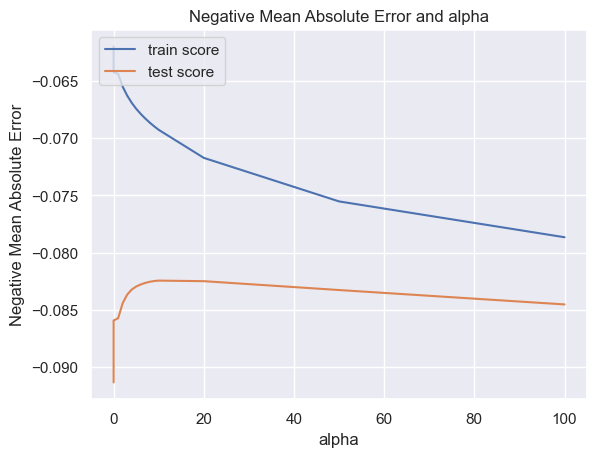

In [296]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [297]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.61288459e-02,  1.04350972e-02,  2.08986685e-02,  6.86856561e-02,
        5.29470932e-02,  6.32956282e-05,  3.24915894e-02,  8.87066657e-03,
        3.20623835e-02,  5.00338842e-02,  4.27966328e-02,  3.44083023e-03,
        7.92461764e-02,  1.24392753e-02, -1.21436526e-03,  1.06336878e-02,
        1.33127837e-02, -8.82780667e-04, -9.47302909e-03,  6.15237762e-03,
        2.02013326e-02,  1.28391619e-02, -3.27687014e-03,  1.07651299e-02,
        4.79944359e-03,  1.32040501e-02,  9.54071532e-03, -1.47166116e-06,
       -7.06009027e-02,  5.87469129e-02,  2.75447744e-02,  6.00177711e-02,
        1.65745271e-02, -2.47780792e-03, -1.44759668e-02, -3.48515331e-03,
        1.75243859e-02, -8.03019293e-03,  5.12218703e-03,  1.60762115e-02,
       -9.11902567e-03, -1.23869859e-02, -1.94727098e-02,  9.16501134e-03,
       -1.53824037e-02, -4.57511113e-03, -4.51383307e-03,  2.60016739e-02,
        2.63167750e-02, -6.59111033e-03,  9.10704514e-02, -3.70865539e-02,
       -1.54464302e-02, -

In [298]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.768),
 ('MSSubClass', -0.016),
 ('LotFrontage', 0.01),
 ('LotArea', 0.021),
 ('OverallQual', 0.069),
 ('OverallCond', 0.053),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.032),
 ('BsmtFinSF2', 0.009),
 ('TotalBsmtSF', 0.032),
 ('1stFlrSF', 0.05),
 ('2ndFlrSF', 0.043),
 ('LowQualFinSF', 0.003),
 ('GrLivArea', 0.079),
 ('BsmtFullBath', 0.012),
 ('BsmtHalfBath', -0.001),
 ('FullBath', 0.011),
 ('HalfBath', 0.013),
 ('BedroomAbvGr', -0.001),
 ('KitchenAbvGr', -0.009),
 ('Fireplaces', 0.006),
 ('GarageArea', 0.02),
 ('WoodDeckSF', 0.013),
 ('OpenPorchSF', -0.003),
 ('EnclosedPorch', 0.011),
 ('3SsnPorch', 0.005),
 ('ScreenPorch', 0.013),
 ('PoolArea', 0.01),
 ('MiscVal', -0.0),
 ('PropertyAge', -0.071),
 ('MSZoning_FV', 0.059),
 ('MSZoning_RH', 0.028),
 ('MSZoning_RL', 0.06),
 ('MSZoning_RM', 0.017),
 ('LotShape_IR2', -0.002),
 ('LotShape_IR3', -0.014),
 ('LotShape_Reg', -0.003),
 ('LandContour_HLS', 0.018),
 ('LandContour_Low', -0.008),
 ('LandContour_Lvl', 0.005),
 ('LotConfig

In [299]:
# ridge regression
lm = Ridge(alpha=10)
lm.fit(X_train, y_train)

# predict
y_train_pred_ridge = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_ridge))
y_test_pred_ridge = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

0.9338289537540896
0.908492540293526


Text(0, 0.5, 'Sales Price')

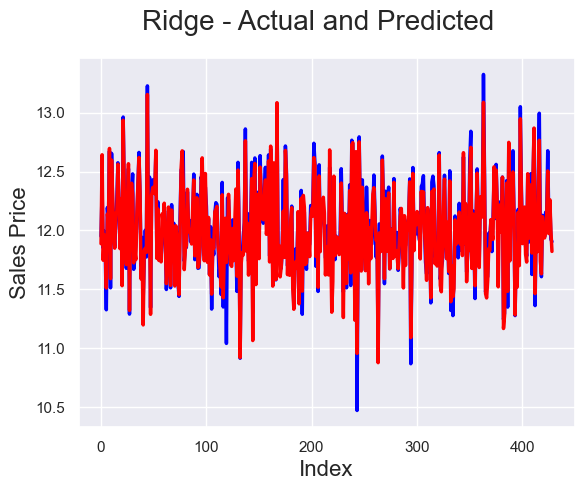

In [325]:
# Ridge Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_pred_ridge, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Ridge - Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16)    

In [301]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 9937646189.46333


In [302]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

In [303]:
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

Variable   Coeff
0                 constant  11.768
51    Neighborhood_Crawfor   0.091
13               GrLivArea   0.079
4              OverallQual   0.069
234   SaleCondition_Normal   0.065
196         Functional_Typ   0.065
235  SaleCondition_Partial   0.062
32             MSZoning_RL   0.060
30             MSZoning_FV   0.059
67    Neighborhood_StoneBr   0.057
71         Condition1_Norm   0.054
5              OverallCond   0.053
10                1stFlrSF   0.050
108    Exterior1st_BrkFace   0.049
147       Foundation_PConc   0.045
11                2ndFlrSF   0.043
159        BsmtExposure_Gd   0.040
228           SaleType_New   0.039
7               BsmtFinSF1   0.032
9              TotalBsmtSF   0.032

In [305]:
## since there were few coefficients at 0, we removed them from features
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

Variable   Coeff
0                constant  11.768
51   Neighborhood_Crawfor   0.091
13              GrLivArea   0.079
4             OverallQual   0.069
234  SaleCondition_Normal   0.065
..                    ...     ...
194        Functional_Mod  -0.042
190        KitchenQual_TA  -0.048
55   Neighborhood_MeadowV  -0.054
54    Neighborhood_IDOTRR  -0.068
29            PropertyAge  -0.071

[223 rows x 2 columns]

In [306]:
predRFE.shape

(223, 2)

### Findings - r2 score with ridge regresion on train and test data are close to each other and are above 90%

## Lasso Regression

In [307]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [308]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 0.001}
-0.08258355972121241


In [309]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.373012      0.078431         0.011745        0.007321      0.0001   
1       0.359257      0.048192         0.018352        0.010763       0.001   
2       0.324413      0.039843         0.008695        0.003541        0.01   
3       0.355104      0.041630         0.036936        0.026307        0.05   
4       0.356728      0.032742         0.016407        0.006706         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.099516          -0.083355          -0.092489   
1   {'alpha': 0.001}          -0.099481          -0.083351          -0.092449   
2    {'alpha': 0.01}          -0.099146          -0.083308          -0.092099   
3    {'alpha': 0.05}          -0.097891          -0.083120          -0.091169   
4     {'alpha': 0.1}          -0.096682          -0.082906          -0.090819   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.095350  ...        -0.091354        0.005932               26   
1          -0.095305  ...        -0.091328        0.005916               25   
2          -0.094868  ...        -0.091088        0.005770               24   
3          -0.093259  ...        -0.090249        0.005270               23   
4          -0.091743  ...        -0.089526        0.004858               22   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.061830           -0.063584           -0.060277   
1           -0.061832           -0.063585           -0.060289   
2           -0.061849           -0.063594           -0.060400   
3           -0.061915           -0.063646           -0.060820   
4           -0.062003           -0.063735           -0.061172   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.061701           -0.062594         -0.061997         0.001091  
1           -0.061705           -0.062598         -0.062002         0.001087  
2           -0.061746           -0.062644         -0.062047         0.001058  
3           -0.061949           -0.062892         -0.062244         0.000960  
4           -0.062189           -0.063129         -0.062446         0.000896  

[5 rows x 21 columns]

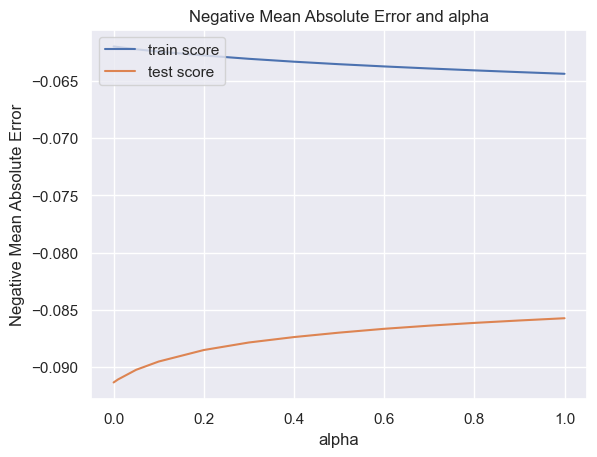

In [310]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [311]:
alpha = 0.001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-1.00719930e-02,  1.16183324e-02,  1.83984577e-02,  8.16726205e-02,
        5.67705065e-02,  0.00000000e+00,  3.63295631e-02,  5.43477743e-03,
        3.47765629e-02,  5.63148378e-03,  0.00000000e+00, -1.76787542e-03,
        1.32628965e-01,  1.37560639e-02, -0.00000000e+00,  4.80943025e-03,
        7.12199524e-03, -3.34767801e-03, -1.06868298e-02,  1.04983278e-02,
        2.68742168e-02,  1.38022350e-02, -0.00000000e+00,  8.83035487e-03,
        4.78254894e-03,  1.27537964e-02,  8.73616144e-03, -1.66751057e-06,
       -8.09119947e-02,  4.61064503e-02,  0.00000000e+00,  4.78081036e-02,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -3.34355516e-03,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  3.32558418e-03,
       -0.00000000e+00, -0.00000000e+00, -1.66061215e-02,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  2.02323433e-02,
        0.00000000e+00, -0.00000000e+00,  9.21189661e-02, -1.35429396e-02,
       -0.00000000e+00, -

In [312]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.779),
 ('MSSubClass', -0.01),
 ('LotFrontage', 0.012),
 ('LotArea', 0.018),
 ('OverallQual', 0.082),
 ('OverallCond', 0.057),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.036),
 ('BsmtFinSF2', 0.005),
 ('TotalBsmtSF', 0.035),
 ('1stFlrSF', 0.006),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.002),
 ('GrLivArea', 0.133),
 ('BsmtFullBath', 0.014),
 ('BsmtHalfBath', -0.0),
 ('FullBath', 0.005),
 ('HalfBath', 0.007),
 ('BedroomAbvGr', -0.003),
 ('KitchenAbvGr', -0.011),
 ('Fireplaces', 0.01),
 ('GarageArea', 0.027),
 ('WoodDeckSF', 0.014),
 ('OpenPorchSF', -0.0),
 ('EnclosedPorch', 0.009),
 ('3SsnPorch', 0.005),
 ('ScreenPorch', 0.013),
 ('PoolArea', 0.009),
 ('MiscVal', -0.0),
 ('PropertyAge', -0.081),
 ('MSZoning_FV', 0.046),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.048),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.003),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', -0.0),
 ('LandContour_Lvl', 0.0),
 ('LotConfig_CulDSac', 0.003

In [313]:
# lasso regression
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred_lasso = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_lasso))
y_test_pred_lasso = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

0.9222001186573338
0.9064366556240067


Text(0, 0.5, 'Sales Price')

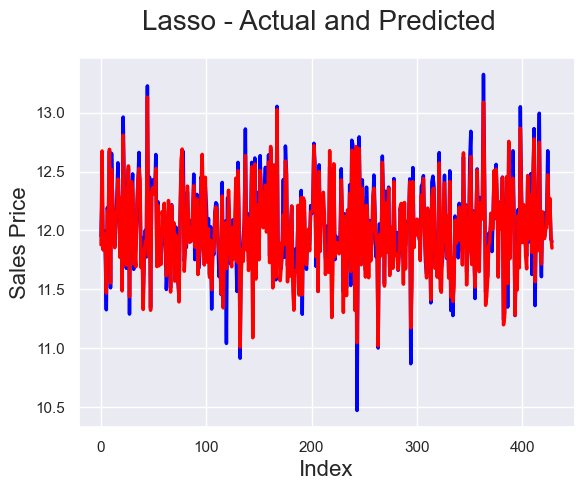

In [326]:
# Lasso Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_pred_lasso, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Lasso - Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16)    

In [315]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 9937646189.46333


In [316]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

In [317]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

Variable   Coeff
0     constant  11.779
1   MSSubClass  -0.010
2  LotFrontage   0.012
3      LotArea   0.018
4  OverallQual   0.082

In [318]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

Variable   Coeff
0                 constant  11.779
13               GrLivArea   0.133
235  SaleCondition_Partial   0.117
51    Neighborhood_Crawfor   0.092
4              OverallQual   0.082
..                     ...     ...
86          BldgType_Twnhs  -0.017
190         KitchenQual_TA  -0.021
183           HeatingQC_TA  -0.022
54     Neighborhood_IDOTRR  -0.057
29             PropertyAge  -0.081

[236 rows x 2 columns]

In [319]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred.head(10)

Variable   Coeff
0                 constant  11.779
13               GrLivArea   0.133
235  SaleCondition_Partial   0.117
51    Neighborhood_Crawfor   0.092
4              OverallQual   0.082
234   SaleCondition_Normal   0.061
196         Functional_Typ   0.060
5              OverallCond   0.057
32             MSZoning_RL   0.048
30             MSZoning_FV   0.046

In [320]:
# These 16 variables obtained from Lasso Regression can be concluded to have the strong effect on the SalePrice
pred.shape

(70, 2)

### Findings - r2 score with lasso regresion on train and test data are close to each other and are above 90%

## Step - 6 - Conclusion


### Simple Linear Regression model is fairly complex and is overfitting, hence we would not consider that.
### r2 values are nearly identical wth both ridge and lasso regression.
### Ridge Regression model is fairly complex, hence we would not consider that.
### Optimum value of lambda for Ridge Regression is 10
### Lasso Regression model is simpler, hence we would consider that, since most co-efficients are zero.
### Optimum value of lambda for Lasso Regression is 0.001

## It is better to use Lasso than Ridge when comparing complexity because Lasso will select the best features from the existing variables while Ridge will keep all the variables while reducing the coefficient of variables.

## QnA

### 1 - What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

#### Answer - 
#### Optimal value of alpha/lambda for ridge regression - 10
#### Optimal value of alpha/lambda for ridge regression - 0.001

#### Ridge - 

In [330]:
# Doubling the value of alpha for ridge regression (From 10 to 20)

alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")

# ridge regression
lm = Ridge(alpha=20)
lm.fit(X_train, y_train)

# predict
y_train_pred_ridge = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_ridge))
y_test_pred_ridge = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

0.9296944181165014
0.9090098612197226


Variable   Coeff
0                 constant  11.811
13               GrLivArea   0.077
4              OverallQual   0.072
51    Neighborhood_Crawfor   0.072
234   SaleCondition_Normal   0.055
196         Functional_Typ   0.055
5              OverallCond   0.054
235  SaleCondition_Partial   0.050
10                1stFlrSF   0.048
71         Condition1_Norm   0.047
32             MSZoning_RL   0.045
11                2ndFlrSF   0.042
67    Neighborhood_StoneBr   0.040
147       Foundation_PConc   0.038
30             MSZoning_FV   0.038
228           SaleType_New   0.038
108    Exterior1st_BrkFace   0.036
9              TotalBsmtSF   0.035
159        BsmtExposure_Gd   0.034
7               BsmtFinSF1   0.033

#### Ridge - As we can see the order of the most important variables changed a bit and now the most important 5 features are

    * GrLivArea
    * OverallQual
    * Neighborhood_Crawfor
    * SaleCondition_Normal
    * Functional_Typ



#### Lasso

In [331]:
# Doubling the value of alpha from 0.001 to 0.002

alpha = 0.002
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

# lasso regression
lm = Lasso(alpha=0.002)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred_lasso = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_lasso))
y_test_pred_lasso = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para.head(10)

0.9138669508408079
0.9036798215118127


Variable   Coeff
0                 constant  11.779
13               GrLivArea   0.133
235  SaleCondition_Partial   0.117
51    Neighborhood_Crawfor   0.092
4              OverallQual   0.082
234   SaleCondition_Normal   0.061
196         Functional_Typ   0.060
5              OverallCond   0.057
32             MSZoning_RL   0.048
30             MSZoning_FV   0.046

### 2 - Which variables are significant in predicting the price of a house?

### Following variables are most significant

    * GrLivArea
    * SaleCondition_Partial
    * Neighborhood_Crawfor
    * OverallQual
    * SaleCondition_Normal


### 3 - How well those variables describe the price of a house ?

1. In Ridge Regression we are able to explain ~90% of variance of data (Train score = 0.93 and Test score = 0.90)
2. In Lasso Regression we are able to explain ~90% of variance of data (Train score = 0.92 and Test score = 0.90)

### 4 - After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [321]:
#Removing top 5 features of Lasso regression and building the model again
lasso_vars = ['GrLivArea','SaleCondition_Partial','Neighborhood_Crawfor','OverallQual','SaleCondition_Normal']

X_train_lasso = X_train.drop(lasso_vars,axis=1)
X_test_lasso = X_test.drop(lasso_vars,axis=1)

In [322]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_lasso,y_train)

y_train_pred_lasso = lasso.predict(X_train_lasso)
y_test_pred_lasso = lasso.predict(X_test_lasso)

print(r2_score(y_true=y_train,y_pred=y_train_pred_lasso))
print(r2_score(y_true=y_test,y_pred=y_test_pred_lasso))

0.9112968085439112
0.8931441016549596


In [332]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train_lasso.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

Feature       Coef
0              MSSubClass  11.840541
13               FullBath   0.130009
4              MasVnrArea   0.090594
51   Neighborhood_MeadowV   0.066734
5              BsmtFinSF1   0.056192
196        FireplaceQu_TA   0.041071
32           LotShape_IR3   0.038845
7             TotalBsmtSF   0.038711
9                2ndFlrSF   0.036370
71        Condition1_RRAn   0.034694

#### The five most important features now after removing the original ones and rebuilding the model are:
1.	MSSubClass
2.	LowQualFinSF
3.	2ndFlrSF
4.	FireplaceQu_Fa
5.	MasVnrArea


## Conclusion


### Simple Linear Regression model is fairly complex and is overfitting, hence we would not consider that.
### r2 values are nearly identical wth both ridge and lasso regression.
### Ridge Regression model is fairly complex, hence we would not consider that.
### Optimum value of lambda for Ridge Regression is 10
### Lasso Regression model is simpler, hence we would consider that, since most co-efficients are zero.
### Optimum value of lambda for Lasso Regression is 0.001

## It is better to use Lasso than Ridge when comparing complexity because Lasso will select the best features from the existing variables while Ridge will keep all the variables while reducing the coefficient of variables.